Aim: Open the titanic.csv file, read from it, and print first 50 rows 

1. You must use the 'with' keyword to open your file. 
2. Since you are dealing with a csv file, you must first import the csv module
3. Use the csv.reader() function to open the file. Store the contents inside a variable. 
4. csv.reader() will return an object that you can iterate/loop over. These are also called iterators. 
5. Use next() function to get the names of the column. This will be returned as a list. Print the column names
6. Loop over the iterator object that csv.reader() returned to print only the first 50 rows from the dataset

In [13]:
import csv # Need this to handle csv files

# Open the file using the 'with' keyword
# to open a csv file, you use csv.reader() function

with open('titanic.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file) # Returns an object that you can loop over. They are also called iterators
    
    # Extract only the column names to see what variables your dataset contains
    header = next(csv_reader)
    print(header)

    for index, row in enumerate(csv_reader):
        if index < 50:
            print(index, row)
            #print(row)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
0 ['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
1 ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
2 ['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
3 ['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
4 ['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S']
5 ['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q']
6 ['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S']
7 ['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S']
8 ['9', '1', '3', 'Johnson, 

Aim: Finding missing data, highlighting them, and printing them

1. Repeat the same process as above to open the csv file, use the next() function to access the header and thne for loop to start iterating over all the rows
2. Create a dictionary that stores the name of columns and the amount of missing values in it
3. Loop over every value of every row to find if there is an empty string inside, which would indicate a missing value
4. Once you find missing values, increment their value by 1 and then store it in the dictionary using the header name as the key and the increments as the value.
5. Loop over the dictionary to print each column name (key) and the missing values present in them 

In [12]:

with open('titanic.csv', mode='r') as file:
    
    csv_reader = csv.reader(file)
    
    header = next(csv_reader)
    
    # Initialize a dictionary to count missing values for each column
    missing_values = {column: 0 for column in header}
    
    # Iterate through each row in the dataset
    for row in csv_reader:
        # Check each column in the row
        for i, value in enumerate(row):
            if value == '':  # Check for empty string (missing value)
                # Increment the missing value count for that column
                missing_values[header[i]] += 1
    
    # Print the missing values count for each column
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")


PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values


Aim: Calculate mean, median, and mode

1. Calcualte the appropriate central tendency value for the 'Age' column
2. Calcualte the appropriate central tendency value for the 'Fare' column
3. Calcualte the appropriate central tendency value for the 'Pclass' column
4. Calcualte the appropriate central tendency value for the 'Embarked' column
5. Calcualte the appropriate central tendency value for the 'Survived' column
6. Calcualte the appropriate central tendency value for the 'Sex' column


In [40]:
from collections import Counter

with open('titanic.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    age_present = []
    fare_list = []
    pclass_list = []
    
    # Iterate through the rows
    for row in csv_reader:
        # Handle missing values for Age
        if row[5]:  # If age is not empty
            age_present.append(float(row[5]))
        else:
            age_present.append(None)  # Add None if age is missing
        
        if row[9]:
            fare_list.append(float(row[9]))
        else:
            fare_list.append(None)  # Add None if age is missing

        if row[2]:
            pclass_list.append(int(row[2]))
        else:
            pclass_list.append(None)  # Add None if age is missing
    
    valid_ages = [age for age in age_present if age is not None]  # Remove None values
    mean_age = sum(valid_ages) / len(valid_ages)

    valid_ages.sort()

    n = len(valid_ages)

    if n%2 == 0:
        median_age = (valid_ages[n//2 - 1] + valid_ages[n//2]) / 2
    else:
        median_age = valid_ages[n//2]

    valid_fares = [fare for fare in fare_list if fare is not None]  # Remove None values
    mean_fare = sum(valid_fares) / len(valid_fares)


    # Mode calculation
    pclass_counter = Counter(pclass_list)
    mode_pclass = pclass_counter.most_common(1)[0][0]

    
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mean Fare: {mean_fare}")
print(f"Mode Pclass: {mode_pclass}")


Mean Age: 29.69911764705882
Median Age: 28.0
Mean Fare: 32.2042079685746
Mode Pclass: 3


Aim: Plotting different variables from the dataset

1. Use the most suitable plot to visualize 'Age' variable
2. Use the most suitable plot to visualize 'Pclass' variable
3. Use the most suitable plot to visualize 'Sex' variable
4. Use the most suitable plot to visualize 'Survived' variable
5. Use the most suitable plot to visualize 'Fare' variable
6. Use the most suitable plot to visualize 'Embarked' variable

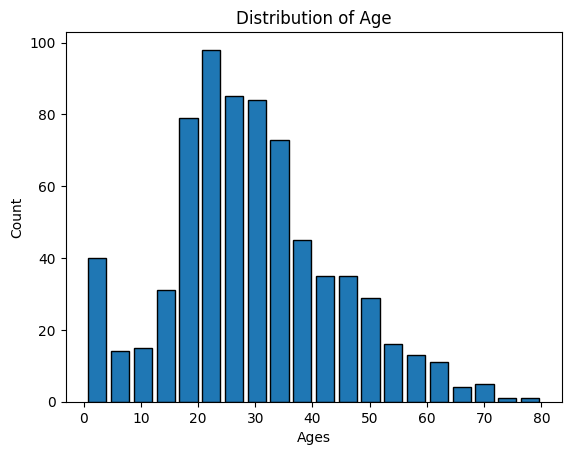

In [47]:
#Age as a histogram
import matplotlib.pyplot as plt


plt.hist(valid_ages, bins=20, edgecolor='black', rwidth=0.8)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


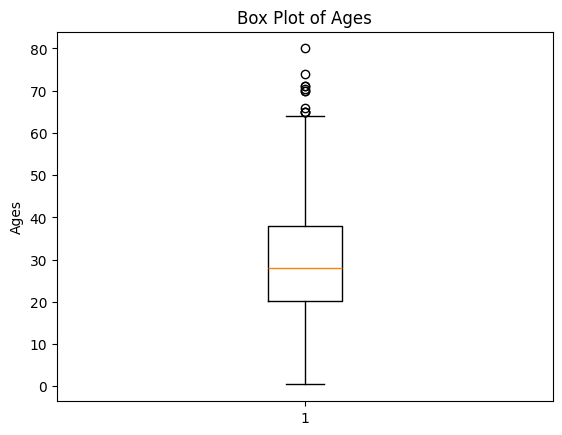

In [49]:
#Age as a boxplot

import matplotlib.pyplot as plt


plt.boxplot(valid_ages)
plt.title('Box Plot of Ages')
plt.ylabel('Ages')
plt.show()


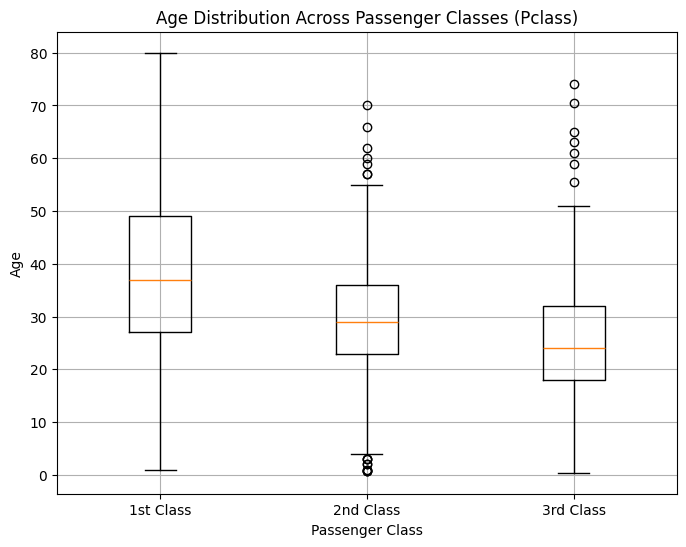

In [53]:
import matplotlib.pyplot as plt
import csv

# Load Titanic dataset and filter Pclass and Age
pclass_1_age = []
pclass_2_age = []
pclass_3_age = []

with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age']:  # Check if 'Age' is not missing
            age = float(row['Age'])
            pclass = int(row['Pclass'])
            
            # Append to the corresponding list based on Pclass
            if pclass == 1:
                pclass_1_age.append(age)
            elif pclass == 2:
                pclass_2_age.append(age)
            elif pclass == 3:
                pclass_3_age.append(age)

# Prepare the data for the box plot
data = [pclass_1_age, pclass_2_age, pclass_3_age]

# Create the box plot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['1st Class', '2nd Class', '3rd Class'])
plt.title('Age Distribution Across Passenger Classes (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()


Bar chart for Sex

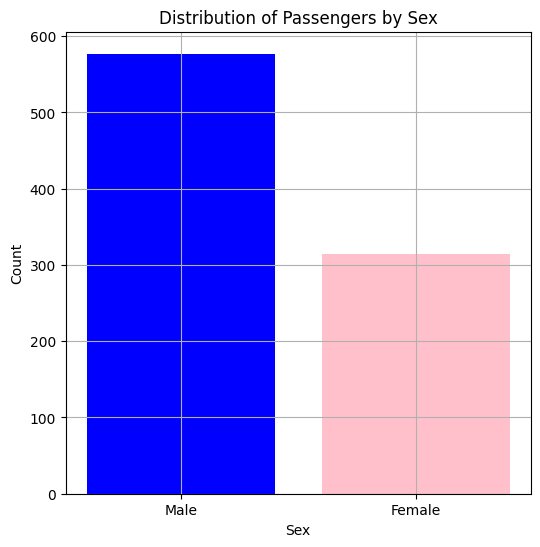

In [54]:
import matplotlib.pyplot as plt
import csv

# Initialize counters for male and female passengers
male_count = 0
female_count = 0

# Open the Titanic dataset and count the occurrences of "male" and "female" in the 'Sex' column
with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Sex'] == 'male':
            male_count += 1
        elif row['Sex'] == 'female':
            female_count += 1

# Prepare data for plotting
categories = ['Male', 'Female']
counts = [male_count, female_count]

# Plot the bar chart using matplotlib
plt.figure(figsize=(6, 6))
plt.bar(categories, counts, color=['blue', 'pink'])
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Bar chart for PClass

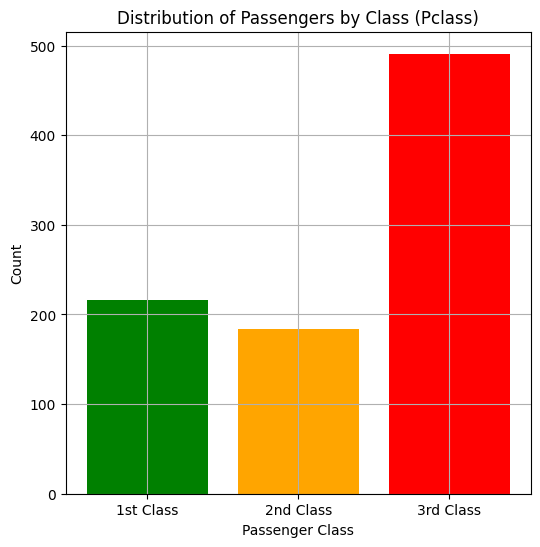

In [55]:
import matplotlib.pyplot as plt
import csv

# Initialize counters for each passenger class (Pclass)
class_1_count = 0
class_2_count = 0
class_3_count = 0

# Open the Titanic dataset and count the occurrences of each Pclass
with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Pclass'] == '1':
            class_1_count += 1
        elif row['Pclass'] == '2':
            class_2_count += 1
        elif row['Pclass'] == '3':
            class_3_count += 1

# Prepare data for plotting
categories = ['1st Class', '2nd Class', '3rd Class']
counts = [class_1_count, class_2_count, class_3_count]

# Plot the bar chart using matplotlib
plt.figure(figsize=(6, 6))
plt.bar(categories, counts, color=['green', 'orange', 'red'])
plt.title('Distribution of Passengers by Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Histogram for the Fare

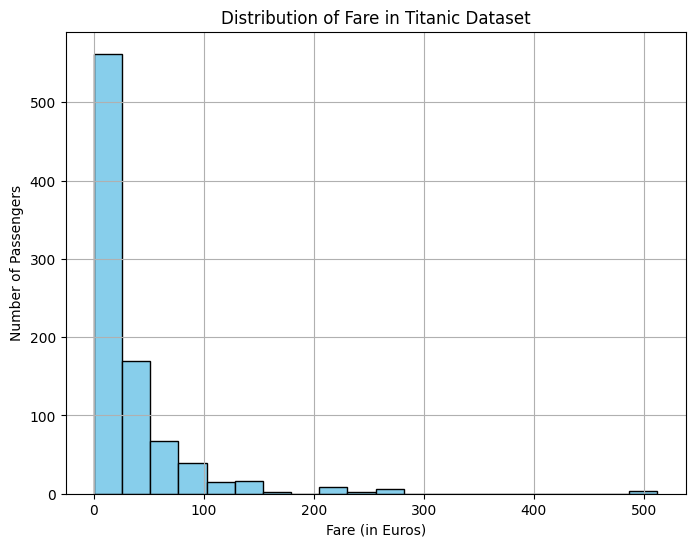

In [56]:
import matplotlib.pyplot as plt
import csv

# Initialize a list to store Fare values
fare_data = []

# Open the Titanic dataset and extract the 'Fare' column
with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Fare']:  # Check if 'Fare' is not missing
            fare_data.append(float(row['Fare']))

# Plot the histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.hist(fare_data, bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Fare in Titanic Dataset')
plt.xlabel('Fare (in Euros)')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


Bar chart of survival rate by sex

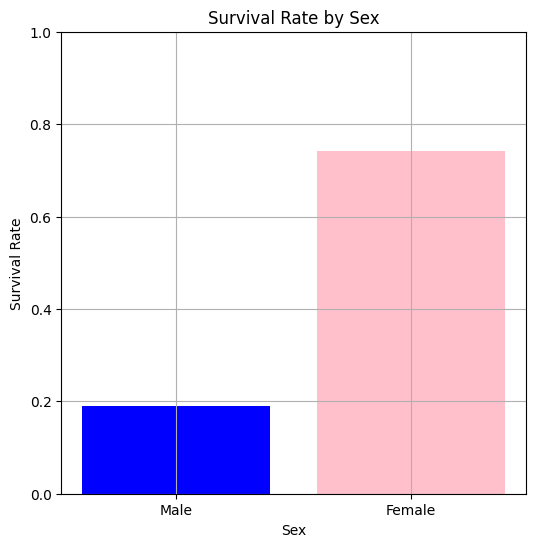

In [57]:
import matplotlib.pyplot as plt
import csv

# Initialize counters for total and survived passengers by sex
total_males = 0
total_females = 0
survived_males = 0
survived_females = 0

# Open the Titanic dataset and calculate totals and survivors by sex
with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        sex = row['Sex']
        survived = int(row['Survived'])
        
        if sex == 'male':
            total_males += 1
            if survived == 1:
                survived_males += 1
        elif sex == 'female':
            total_females += 1
            if survived == 1:
                survived_females += 1

# Calculate survival rates by sex
survival_rate_male = survived_males / total_males if total_males > 0 else 0
survival_rate_female = survived_females / total_females if total_females > 0 else 0

# Plot the survival rates by sex
plt.figure(figsize=(6, 6))
plt.bar(['Male', 'Female'], [survival_rate_male, survival_rate_female], color=['blue', 'pink'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis to 0-1 for percentage
plt.grid(True)
plt.show()


Survival rate by passenger class

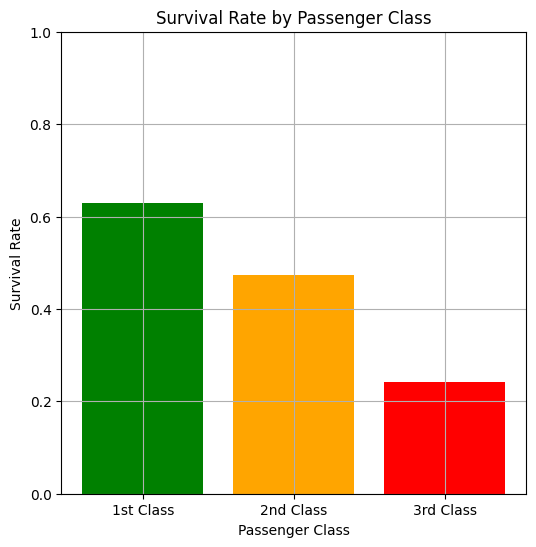

In [58]:
# Initialize counters for total and survived passengers by class
total_class_1 = 0
total_class_2 = 0
total_class_3 = 0
survived_class_1 = 0
survived_class_2 = 0
survived_class_3 = 0

# Open the Titanic dataset and calculate totals and survivors by passenger class
with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        pclass = int(row['Pclass'])
        survived = int(row['Survived'])
        
        if pclass == 1:
            total_class_1 += 1
            if survived == 1:
                survived_class_1 += 1
        elif pclass == 2:
            total_class_2 += 1
            if survived == 1:
                survived_class_2 += 1
        elif pclass == 3:
            total_class_3 += 1
            if survived == 1:
                survived_class_3 += 1

# Calculate survival rates by class
survival_rate_class_1 = survived_class_1 / total_class_1 if total_class_1 > 0 else 0
survival_rate_class_2 = survived_class_2 / total_class_2 if total_class_2 > 0 else 0
survival_rate_class_3 = survived_class_3 / total_class_3 if total_class_3 > 0 else 0

# Plot the survival rates by passenger class
plt.figure(figsize=(6, 6))
plt.bar(['1st Class', '2nd Class', '3rd Class'], 
        [survival_rate_class_1, survival_rate_class_2, survival_rate_class_3], 
        color=['green', 'orange', 'red'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis to 0-1 for percentage
plt.grid(True)
plt.show()


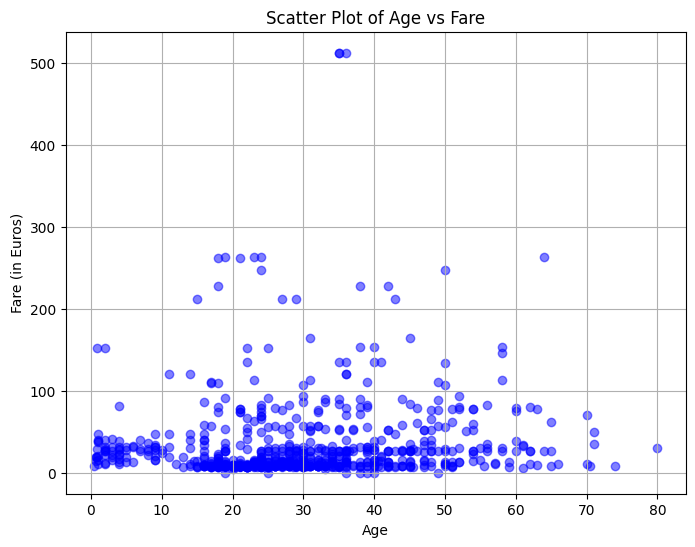

In [60]:
import matplotlib.pyplot as plt
import csv

# Initialize lists to store Age and Fare
age_data = []
fare_data = []

# Open the Titanic dataset and extract Age and Fare
with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age'] and row['Fare']:  # Ensure Age and Fare are not missing
            age_data.append(float(row['Age']))
            fare_data.append(float(row['Fare']))

# Create a scatter plot for Age vs Fare
plt.figure(figsize=(8, 6))
plt.scatter(age_data, fare_data, alpha=0.5, color='blue')

plt.xlabel('Age')
plt.ylabel('Fare (in Euros)')
plt.title('Scatter Plot of Age vs Fare')
plt.grid(True)
plt.show()


Fare vs. survival rate

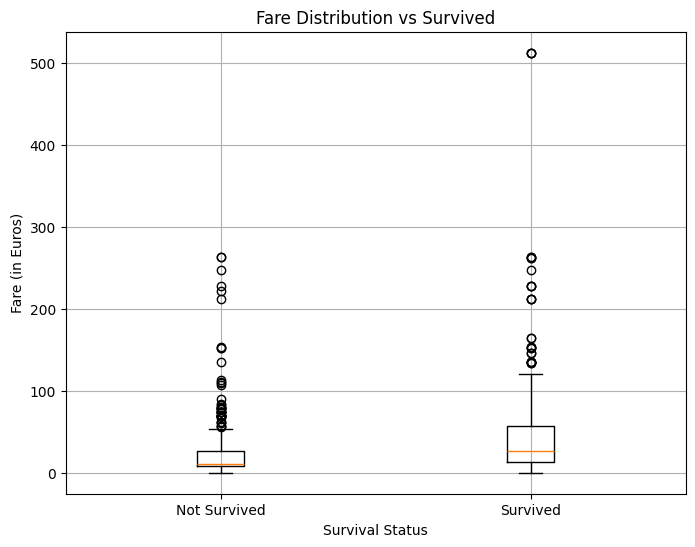

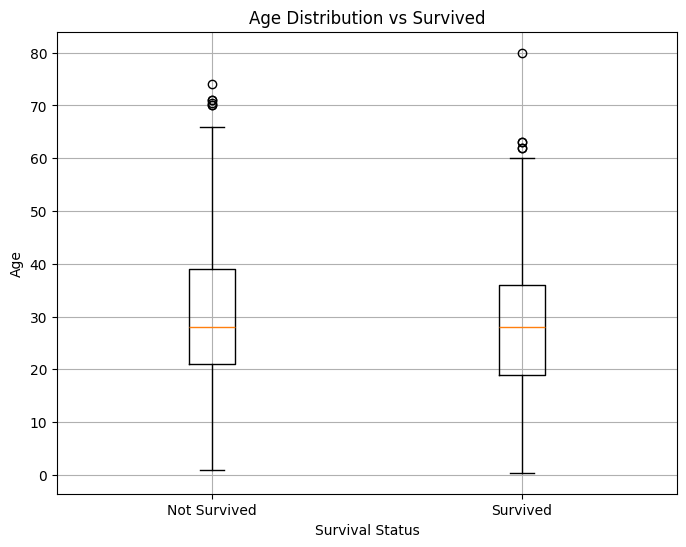

In [61]:
import matplotlib.pyplot as plt
import csv

# Initialize lists to store data for fare and age grouped by survival status
fare_survived = []
fare_not_survived = []
age_survived = []
age_not_survived = []

# Open the Titanic dataset and extract Fare, Age, and Survived
with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Fare'] and row['Survived']:  # Ensure Fare and Survived are not missing
            fare = float(row['Fare'])
            survived = int(row['Survived'])  # 1 = Survived, 0 = Not survived
            
            if survived == 1:
                fare_survived.append(fare)
            else:
                fare_not_survived.append(fare)
        
        if row['Age'] and row['Survived']:  # Ensure Age and Survived are not missing
            age = float(row['Age'])
            survived = int(row['Survived'])  # 1 = Survived, 0 = Not survived
            
            if survived == 1:
                age_survived.append(age)
            else:
                age_not_survived.append(age)

# Prepare data for box plots
fare_data = [fare_not_survived, fare_survived]
age_data = [age_not_survived, age_survived]
labels = ['Not Survived', 'Survived']

# Plot the box plot for Fare distribution vs Survived
plt.figure(figsize=(8, 6))
plt.boxplot(fare_data, labels=labels)
plt.title('Fare Distribution vs Survived')
plt.xlabel('Survival Status')
plt.ylabel('Fare (in Euros)')
plt.grid(True)
plt.show()

# Plot the box plot for Age distribution vs Survived
plt.figure(figsize=(8, 6))
plt.boxplot(age_data, labels=labels)
plt.title('Age Distribution vs Survived')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.grid(True)
plt.show()
